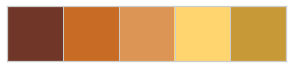

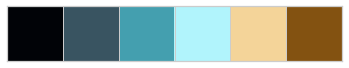

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.patches as patches
from pylab import text
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import nltk
import plotly
from nltk import corpus
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
sns.set(font="'Source Code Pro', monospace")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "'Source Code Pro', monospace"

treasure_colors = ["#703728", "#c86b25", "#dc9555", "#fed56f", "#c89a37"]
pirate_colors = ["#010307", "#395461", "#449FAF", "#B1F4FC", 
                 "#F4D499", "#835211"]
sns.palplot(sns.color_palette(treasure_colors))
sns.palplot(sns.color_palette(pirate_colors))

all_colors = treasure_colors.copy()
all_colors.extend(pirate_colors[1:])
import plotly

In [25]:
data= pd.read_csv('kaggle_survey_2020_responses.csv')
df= pd.read_csv('kaggle_survey_2020_responses.csv')

# EDA of Survey responses.





In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


In [27]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [28]:
df.shape, df.size

((20037, 355), 7113135)

In [29]:
df.drop_duplicates(inplace= True)

In [30]:
df.shape

(20023, 355)

In [31]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       456
                                       ...  
Q35_B_Part_7                           19542
Q35_B_Part_8                           19176
Q35_B_Part_9                           19503
Q35_B_Part_10                          16940
Q35_B_OTHER                            19771
Length: 355, dtype: int64

## 1)	Which age-group is more involved in data science?

<AxesSubplot:>

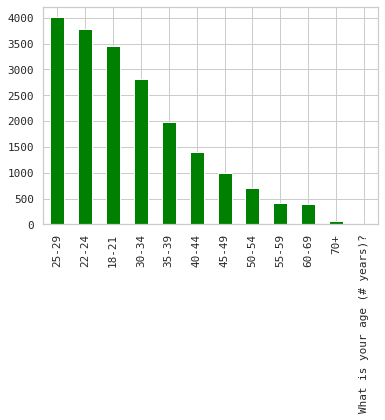

In [32]:
df['Q1'].value_counts().plot(kind='bar', color='green', width=0.5 )


## 2)	How many years of programming background is required for getting into data science field?

In [33]:
df['Q6'].value_counts()

3-5 years                                                            4546
1-2 years                                                            4505
< 1 years                                                            3313
5-10 years                                                           2552
10-20 years                                                          1751
20+ years                                                            1329
I have never written code                                            1124
For how many years have you been writing code and/or programming?       1
Name: Q6, dtype: int64

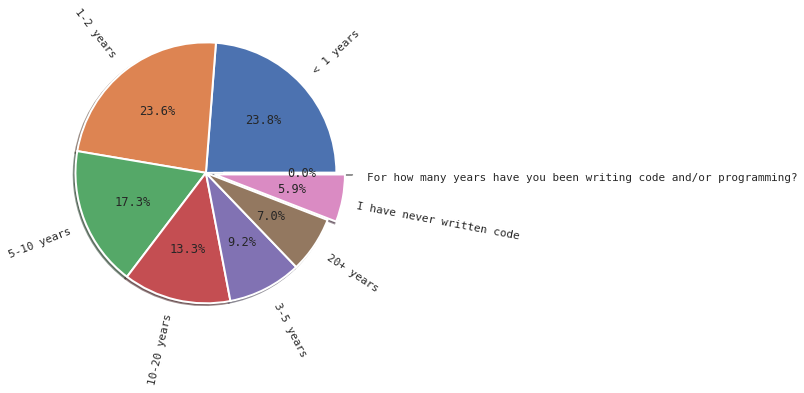

In [34]:
labels= ['< 1 years', '1-2 years','5-10 years' ,'10-20 years' ,'3-5 years' , '20+ years' ,'I have never written code', 'For how many years have you been writing code and/or programming?']
plt.pie(df['Q6'].value_counts(), autopct= '%1.1f%%', wedgeprops= {'edgecolor':'white','linewidth':2},rotatelabels=45,labels= labels,explode=[0,0,0,0,0,0,0.1,0.2],radius=1.5, shadow= True)
plt.show()

## 3) What are the higher values of Pay scales in data analysis

In [35]:
Pay_scales= df['Q24'].value_counts()

In [36]:
q = "What is your current yearly compensation (approximate $USD)?"
order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
         '5,000-7,499', '7,500-9,999', '10,000-14,999',  '15,000-19,999',
         '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', 
         '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
         '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', 
         '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']

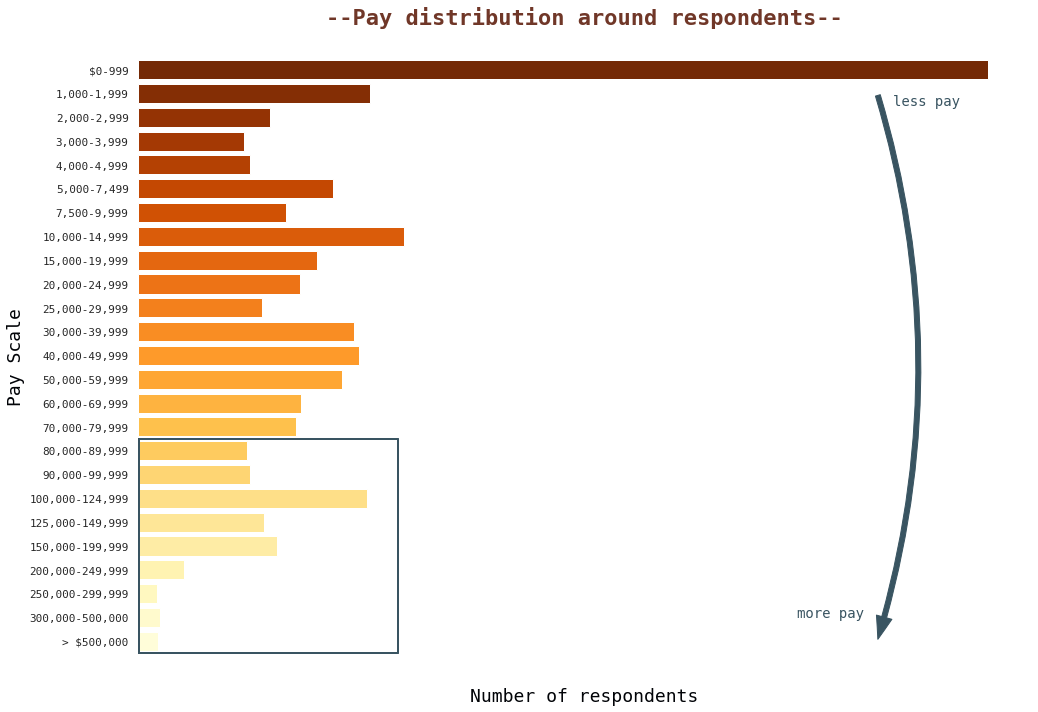

In [37]:
plt.figure(figsize=(16, 12))
plt.rcParams['figure.dpi'] = 360
ax = sns.countplot(y = data['Q24'], order = order, orient="v", palette = "YlOrBr_r", saturation=1)

plt.plot([0, 650], [15.5, 15.5], lw=2, color=pirate_colors[1])
plt.plot([0, 650], [24.5, 24.5], lw=2, color=pirate_colors[1])
plt.plot([650, 650], [15.5, 24.5], lw=2, color=pirate_colors[1])
plt.plot([3, 3], [15.5, 24.5], lw=2, color=pirate_colors[1])

style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color=pirate_colors[1])
arrow = patches.FancyArrowPatch((1850, 1), (1850, 24),
                             connectionstyle="arc3,rad=-.15", **kw)
plt.gca().add_patch(arrow)

plt.text(1890, 1.5, 'less pay', size=14, color=pirate_colors[1])
plt.text(1650, 23, 'more pay', size=14, color=pirate_colors[1])
ax.set_xlabel("Number of respondents", size = 18, color = pirate_colors[0])
ax.set_ylabel("Pay Scale", size = 18, color = pirate_colors[0])
ax.set_title("--Pay distribution around respondents--", 
             size = 22, color = treasure_colors[0], weight='bold')
plt.xticks([])
plt.yticks(fontsize=11)
sns.despine(left=True, bottom=True);

In [38]:
data['Q2'].describe()

count     20037
unique        6
top         Man
freq      15789
Name: Q2, dtype: object

## 5) WHich country has the most number of data Science professionals?

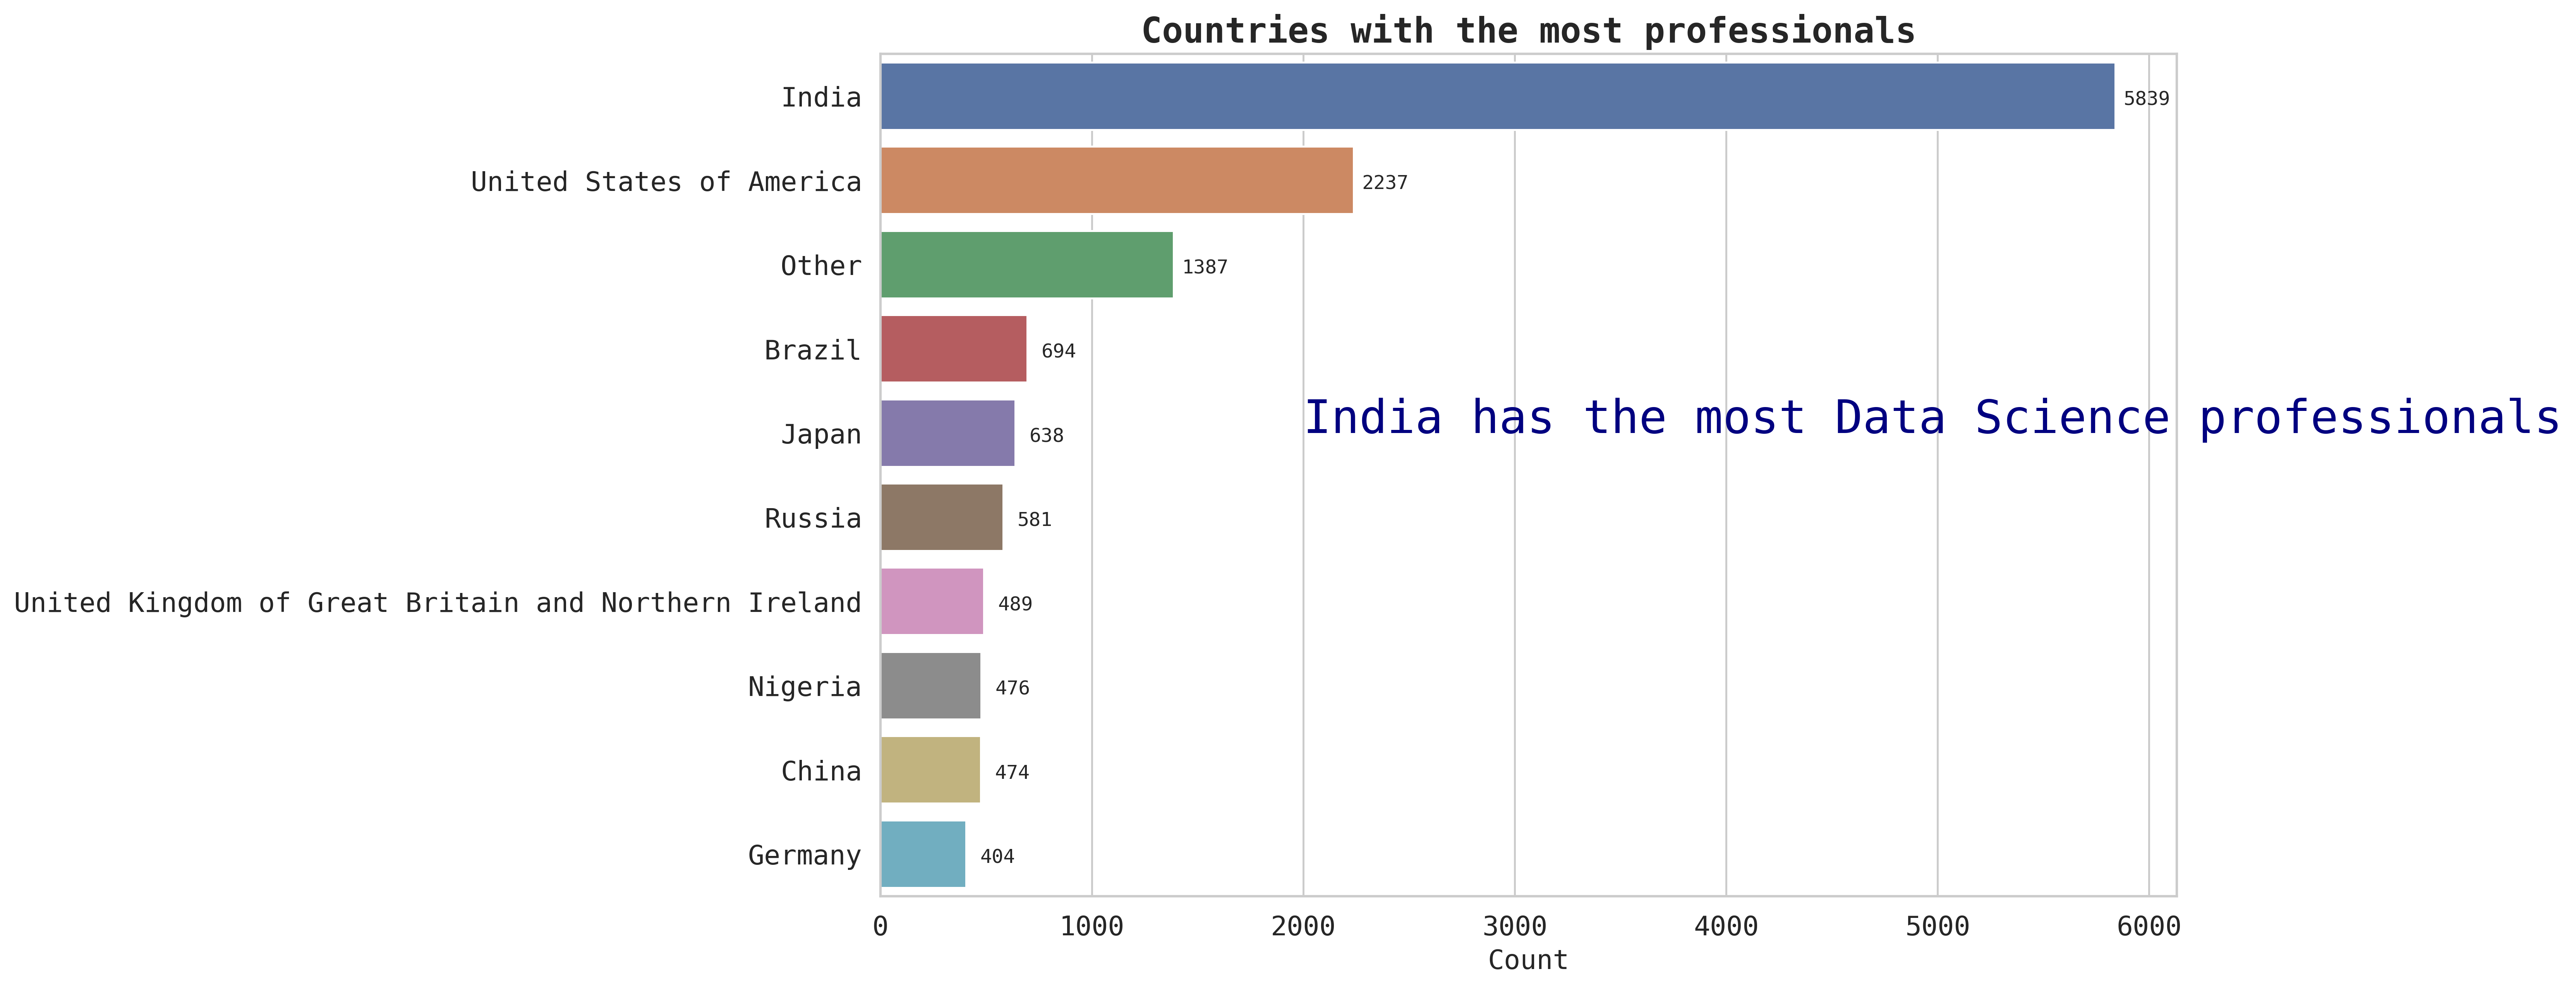

In [39]:
countries_with_most_developers = df['Q3'].value_counts().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(12,8))
#countries_with_most_developers.plot(kind='barh',color=custom_color)
splot = sns.barplot(x = countries_with_most_developers.values ,y = countries_with_most_developers.index )
#Decorating the plot
plt.title('Countries with the most professionals',fontsize=18,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.style.use('ggplot')
#add annotation to each bar
for p in splot.patches:
    width = p.get_width()
    plt.text(150+p.get_width(), p.get_y()+0.55*p.get_height(),int(width),
             ha='center', va='center')

    
#Make a annotation to show the most obvious result
plt.annotate('India has the most Data Science professionals' , xy =(2000,4),fontsize=24,color='navy');

## 6) Which are the most used programming languages for Data Science?

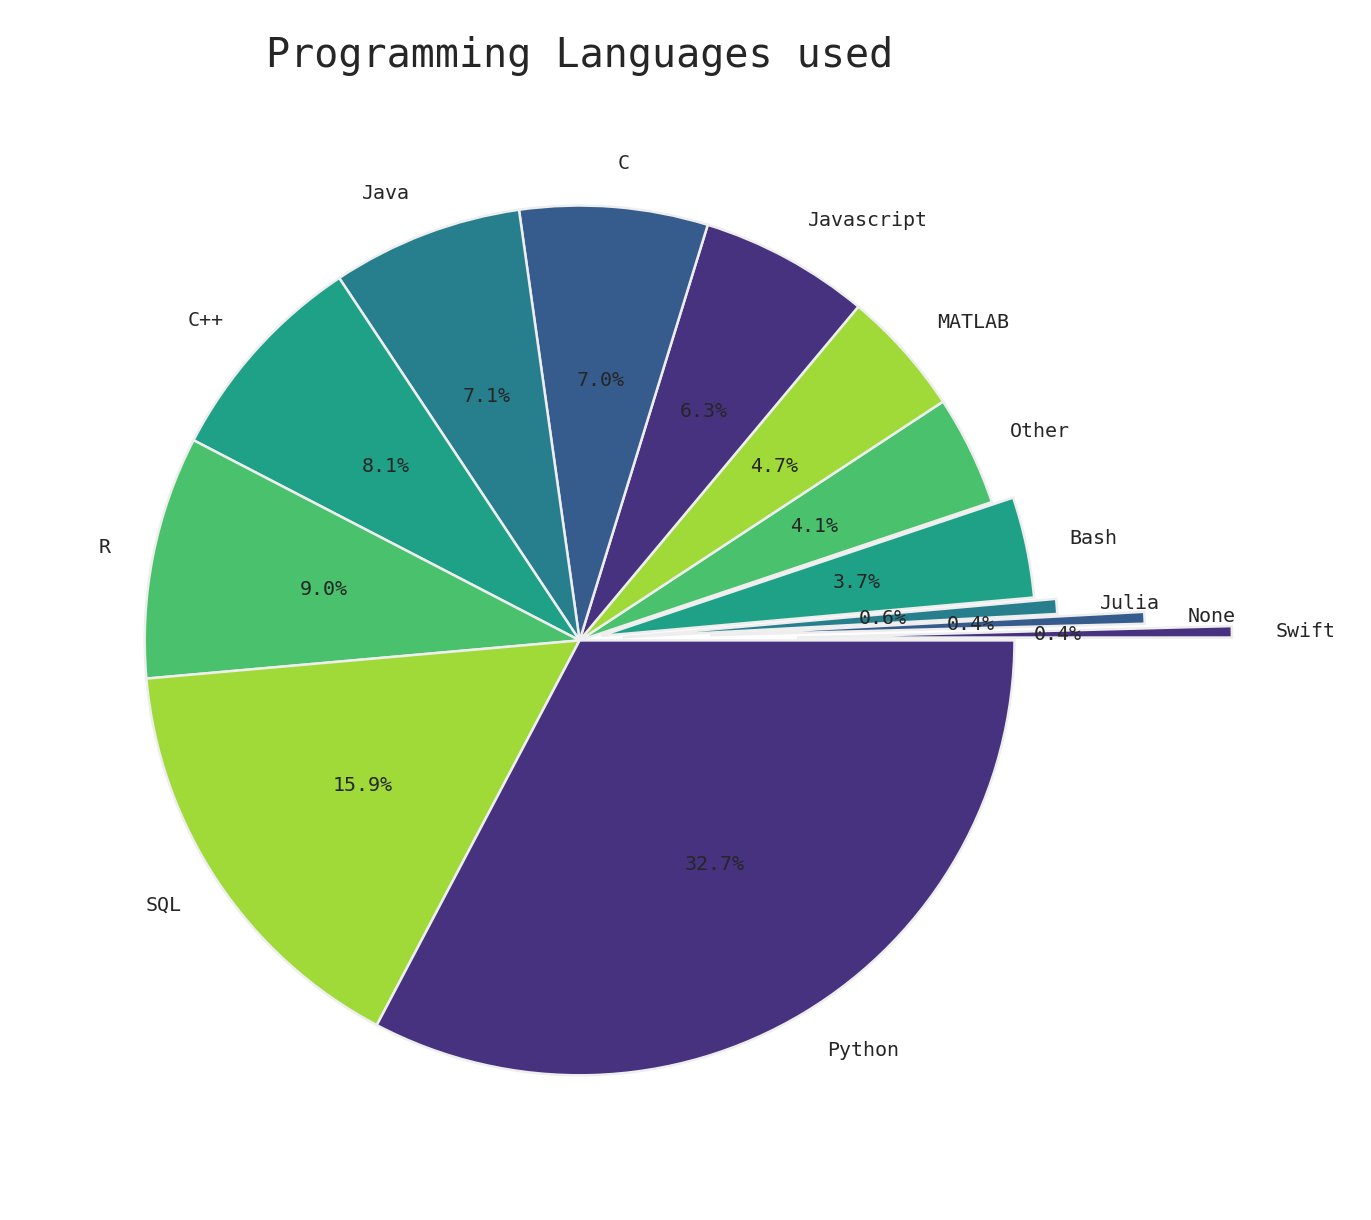

In [40]:
df_language = df[[i for i in df.columns if 'Q7' in i]]
df_language_all = pd.Series(dtype='int')
for i in df_language.columns:
    df_language_all[df_language[i].value_counts().index[0]] = df_language[i].count()

df_language_all = df_language_all.sort_values(ascending=True)
plt.figure(figsize=(4,4))
expl = [0.5,0.3,0.1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
df_language_all.plot(kind='pie',explode=expl,colors=sns.color_palette('viridis'),textprops={'fontsize': 4}, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Programming Languages used', fontsize= 8)
plt.show()

## Q7) Best Visualization libraries used by professionals

In [41]:
df_lib = df[[i for i in df.columns if 'Q14' in i]]
df_lib_all = pd.Series(dtype='int')
for i in df_lib.columns:
    df_lib_all[df_lib[i].value_counts().index[0]] = df_lib[i].count()

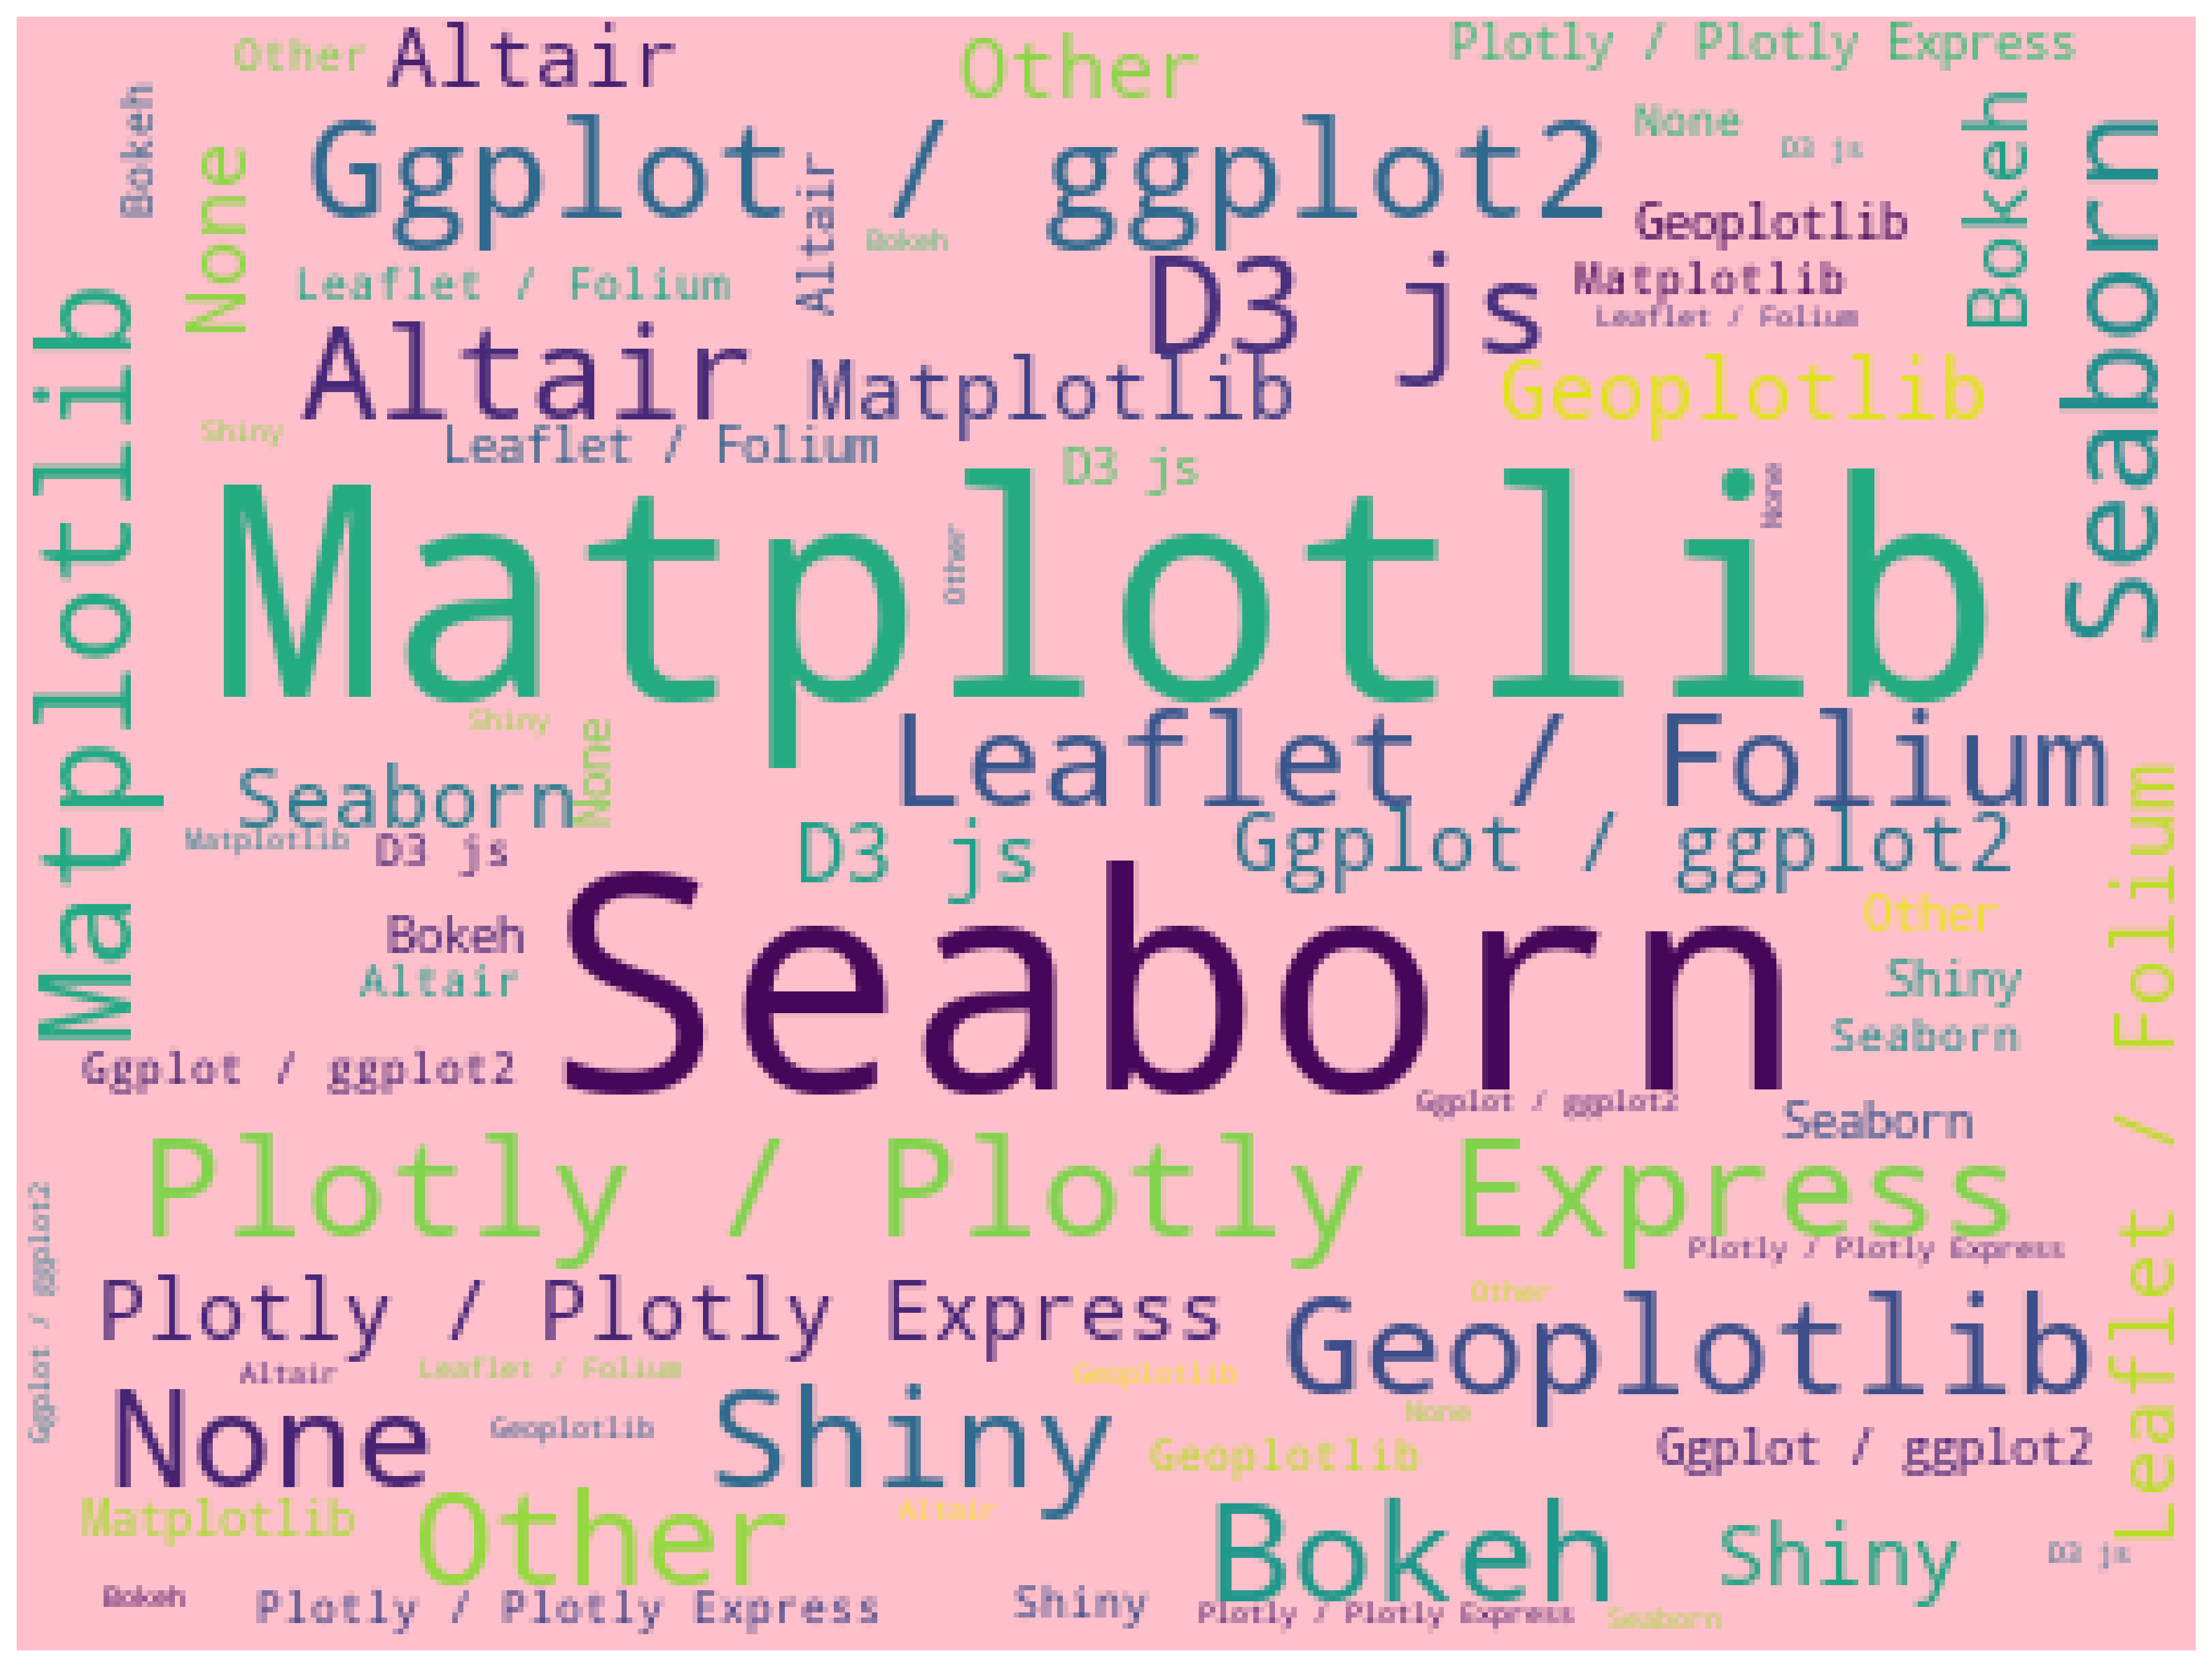

In [42]:
from wordcloud import WordCloud
from PIL import Image


# Define a function to plot word cloud
def cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(18, 13))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")



wordcloud = WordCloud(width = 400, height = 300, random_state=1, background_color='Pink',mode="RGBA"
                      ,max_words=70, collocations=False
                      ,repeat=True).generate_from_frequencies(df_lib_all)
# Plot
cloud(wordcloud)

## Q8)- Which gender has elder people working in Data Science?

Text(0.5, 1.0, 'Distribution of Age and Gender')

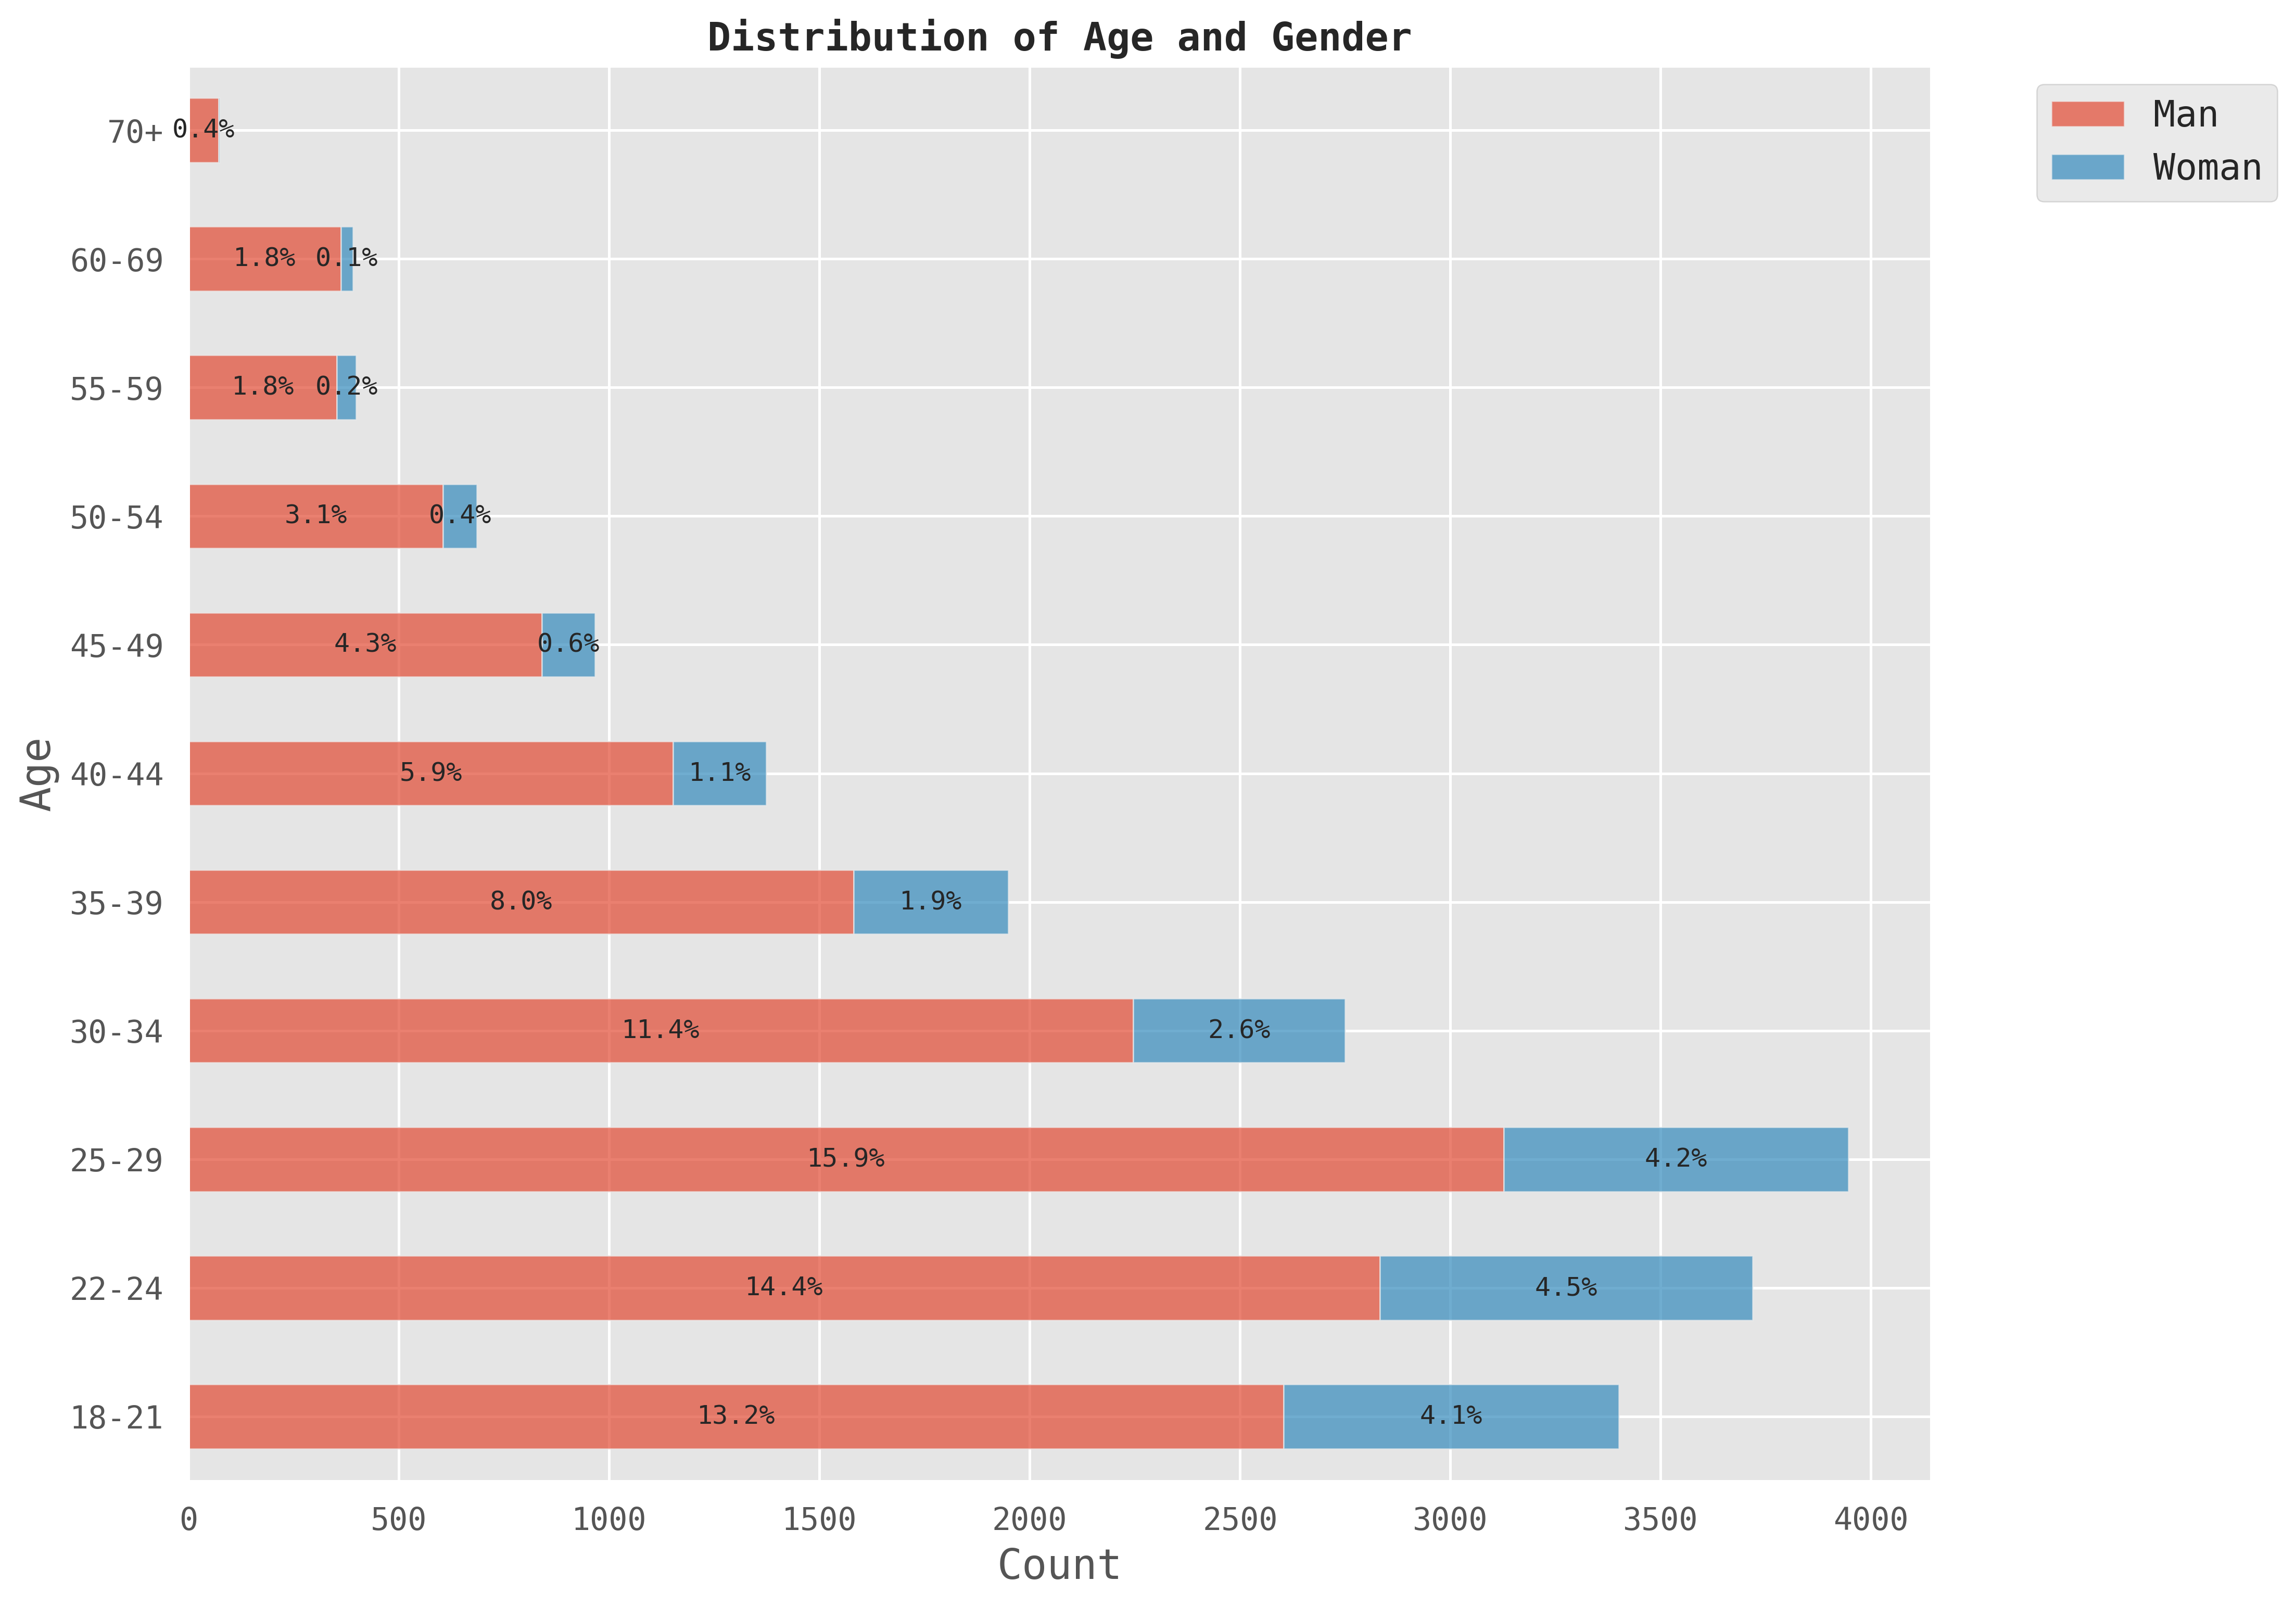

In [43]:
#Let's narrow the genders to only men and women to facilitate the analysis(as they are the main categories)
gender_df = df[df['Q2'].isin(['Man','Woman'])]
table = gender_df.groupby(['Q1', 'Q2']).size().reset_index().pivot(columns='Q2', index='Q1', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#ploting the annotation text
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

#Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Count',fontsize=16)
plt.ylabel('Age',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Age and Gender',fontsize=15,weight='bold')


##  Q9) Which country out of USA or India has the most qualified data professionals?

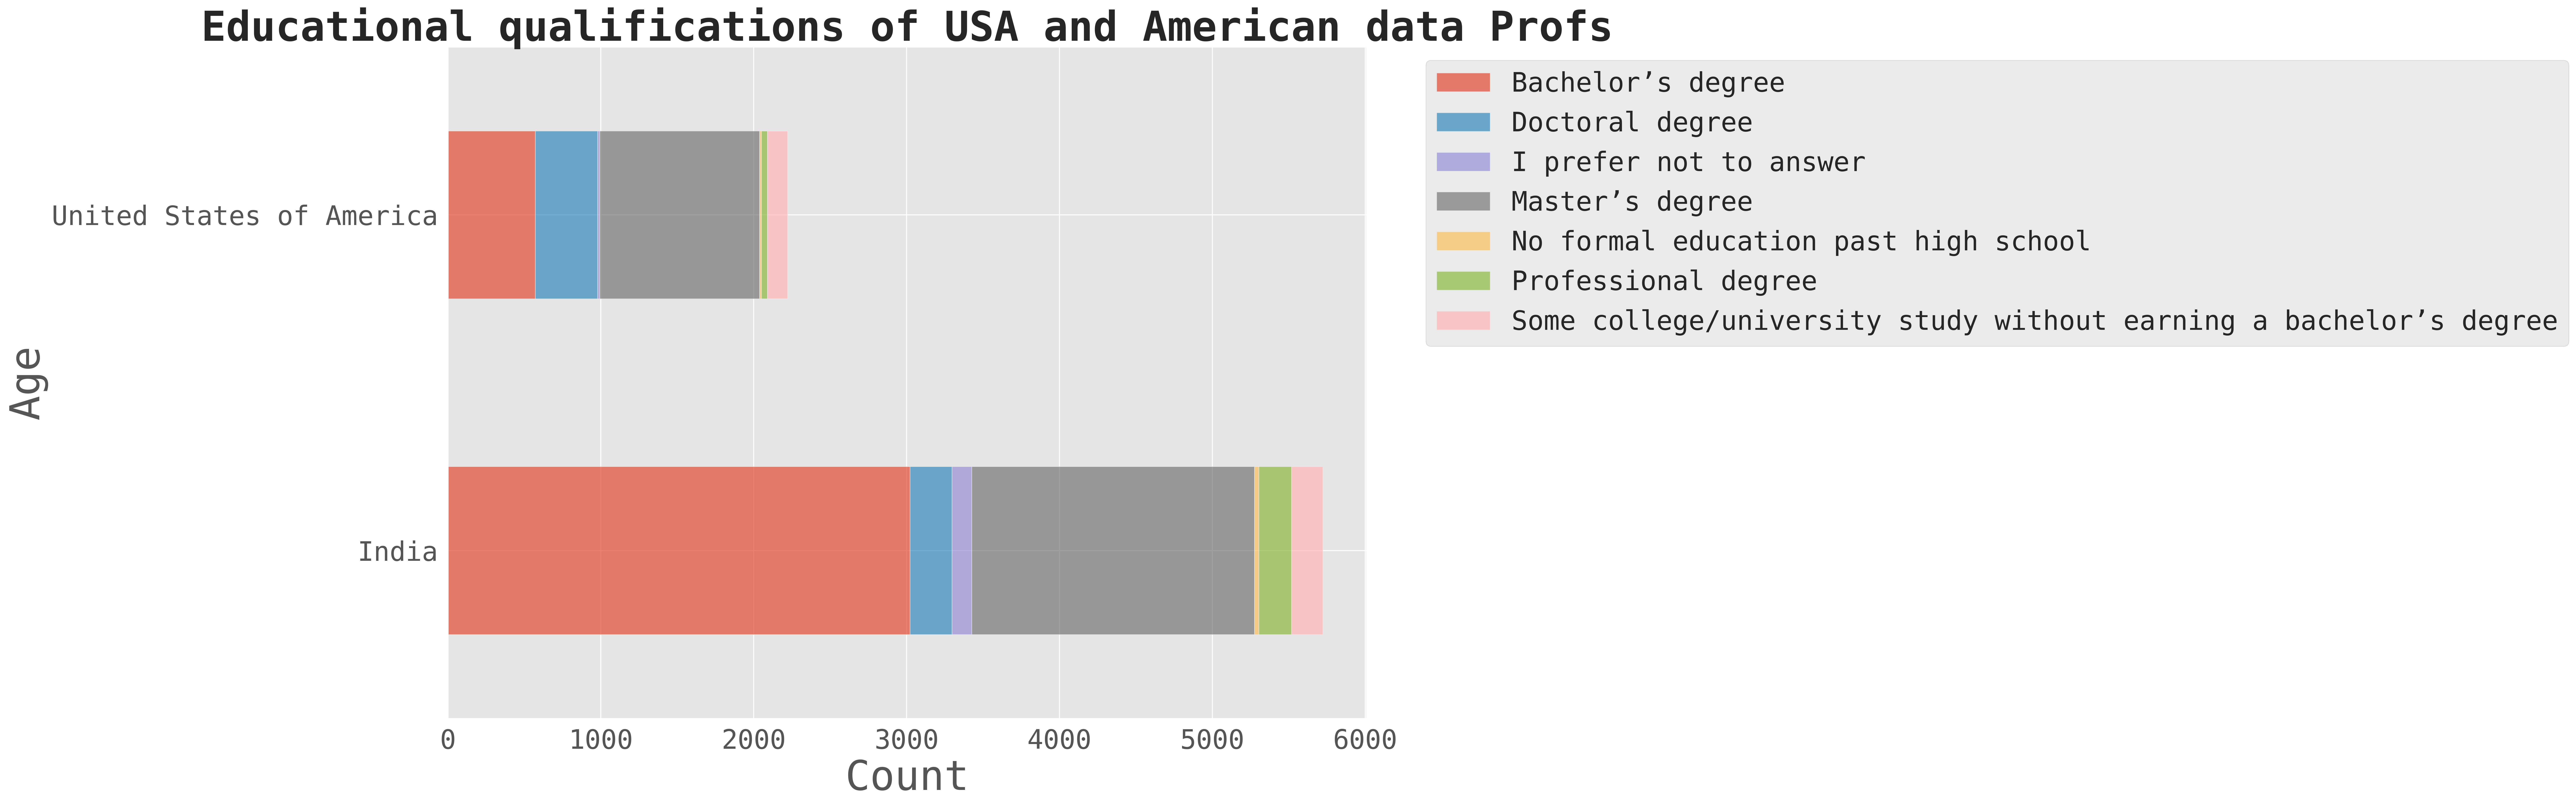

In [44]:
us_in = df[df['Q3'].isin(['India','United States of America'])]
table = us_in.groupby(['Q4', 'Q3']).size().reset_index().pivot(columns='Q4', index='Q3', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#ploting the annotation text
for i in table.index :
    tot_x = 0
    for j in table.columns:
#Decorating the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Count',fontsize=40)
        plt.ylabel('Age',fontsize=40)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Educational qualifications of USA and American data Profs',fontsize=40,weight='bold')
        

## Q10---Visualize most used Languages on basis of Job role and educational qualifications

In [45]:
d = {'Q7_Part_1':'Python','Q7_Part_2':'R','Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++','Q7_Part_6':'Java','Q7_Part_7':'Javascript'
           ,'Q7_Part_8':'Julia','Q7_Part_9':'Swift','Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None','Q7_OTHER':'Other'}
df_lang_copy = gender_df.rename(columns= d)
columns=['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','None','Other']

In [46]:
lang_data= df_lang_copy.groupby('Q5')[columns].count()
n2 = lang_data.unstack().reset_index()
n2 = n2.rename(columns={'level_0':'language','Q5':'role',0:'count'})
new_table = pd.pivot_table(n2,values = 'count',index='language',columns='role')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#Preparing the data by grouping by education background and making a pivot table for the heat map
new_data3= df_lang_copy.groupby('Q4')[columns].count()
n3 = new_data3.unstack().reset_index()
n3 = n3.rename(columns={'level_0':'language','Q4':'education',0:'count'})
new_table2 = pd.pivot_table(n3,values = 'count',index='language',columns='education')
#cmap =sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

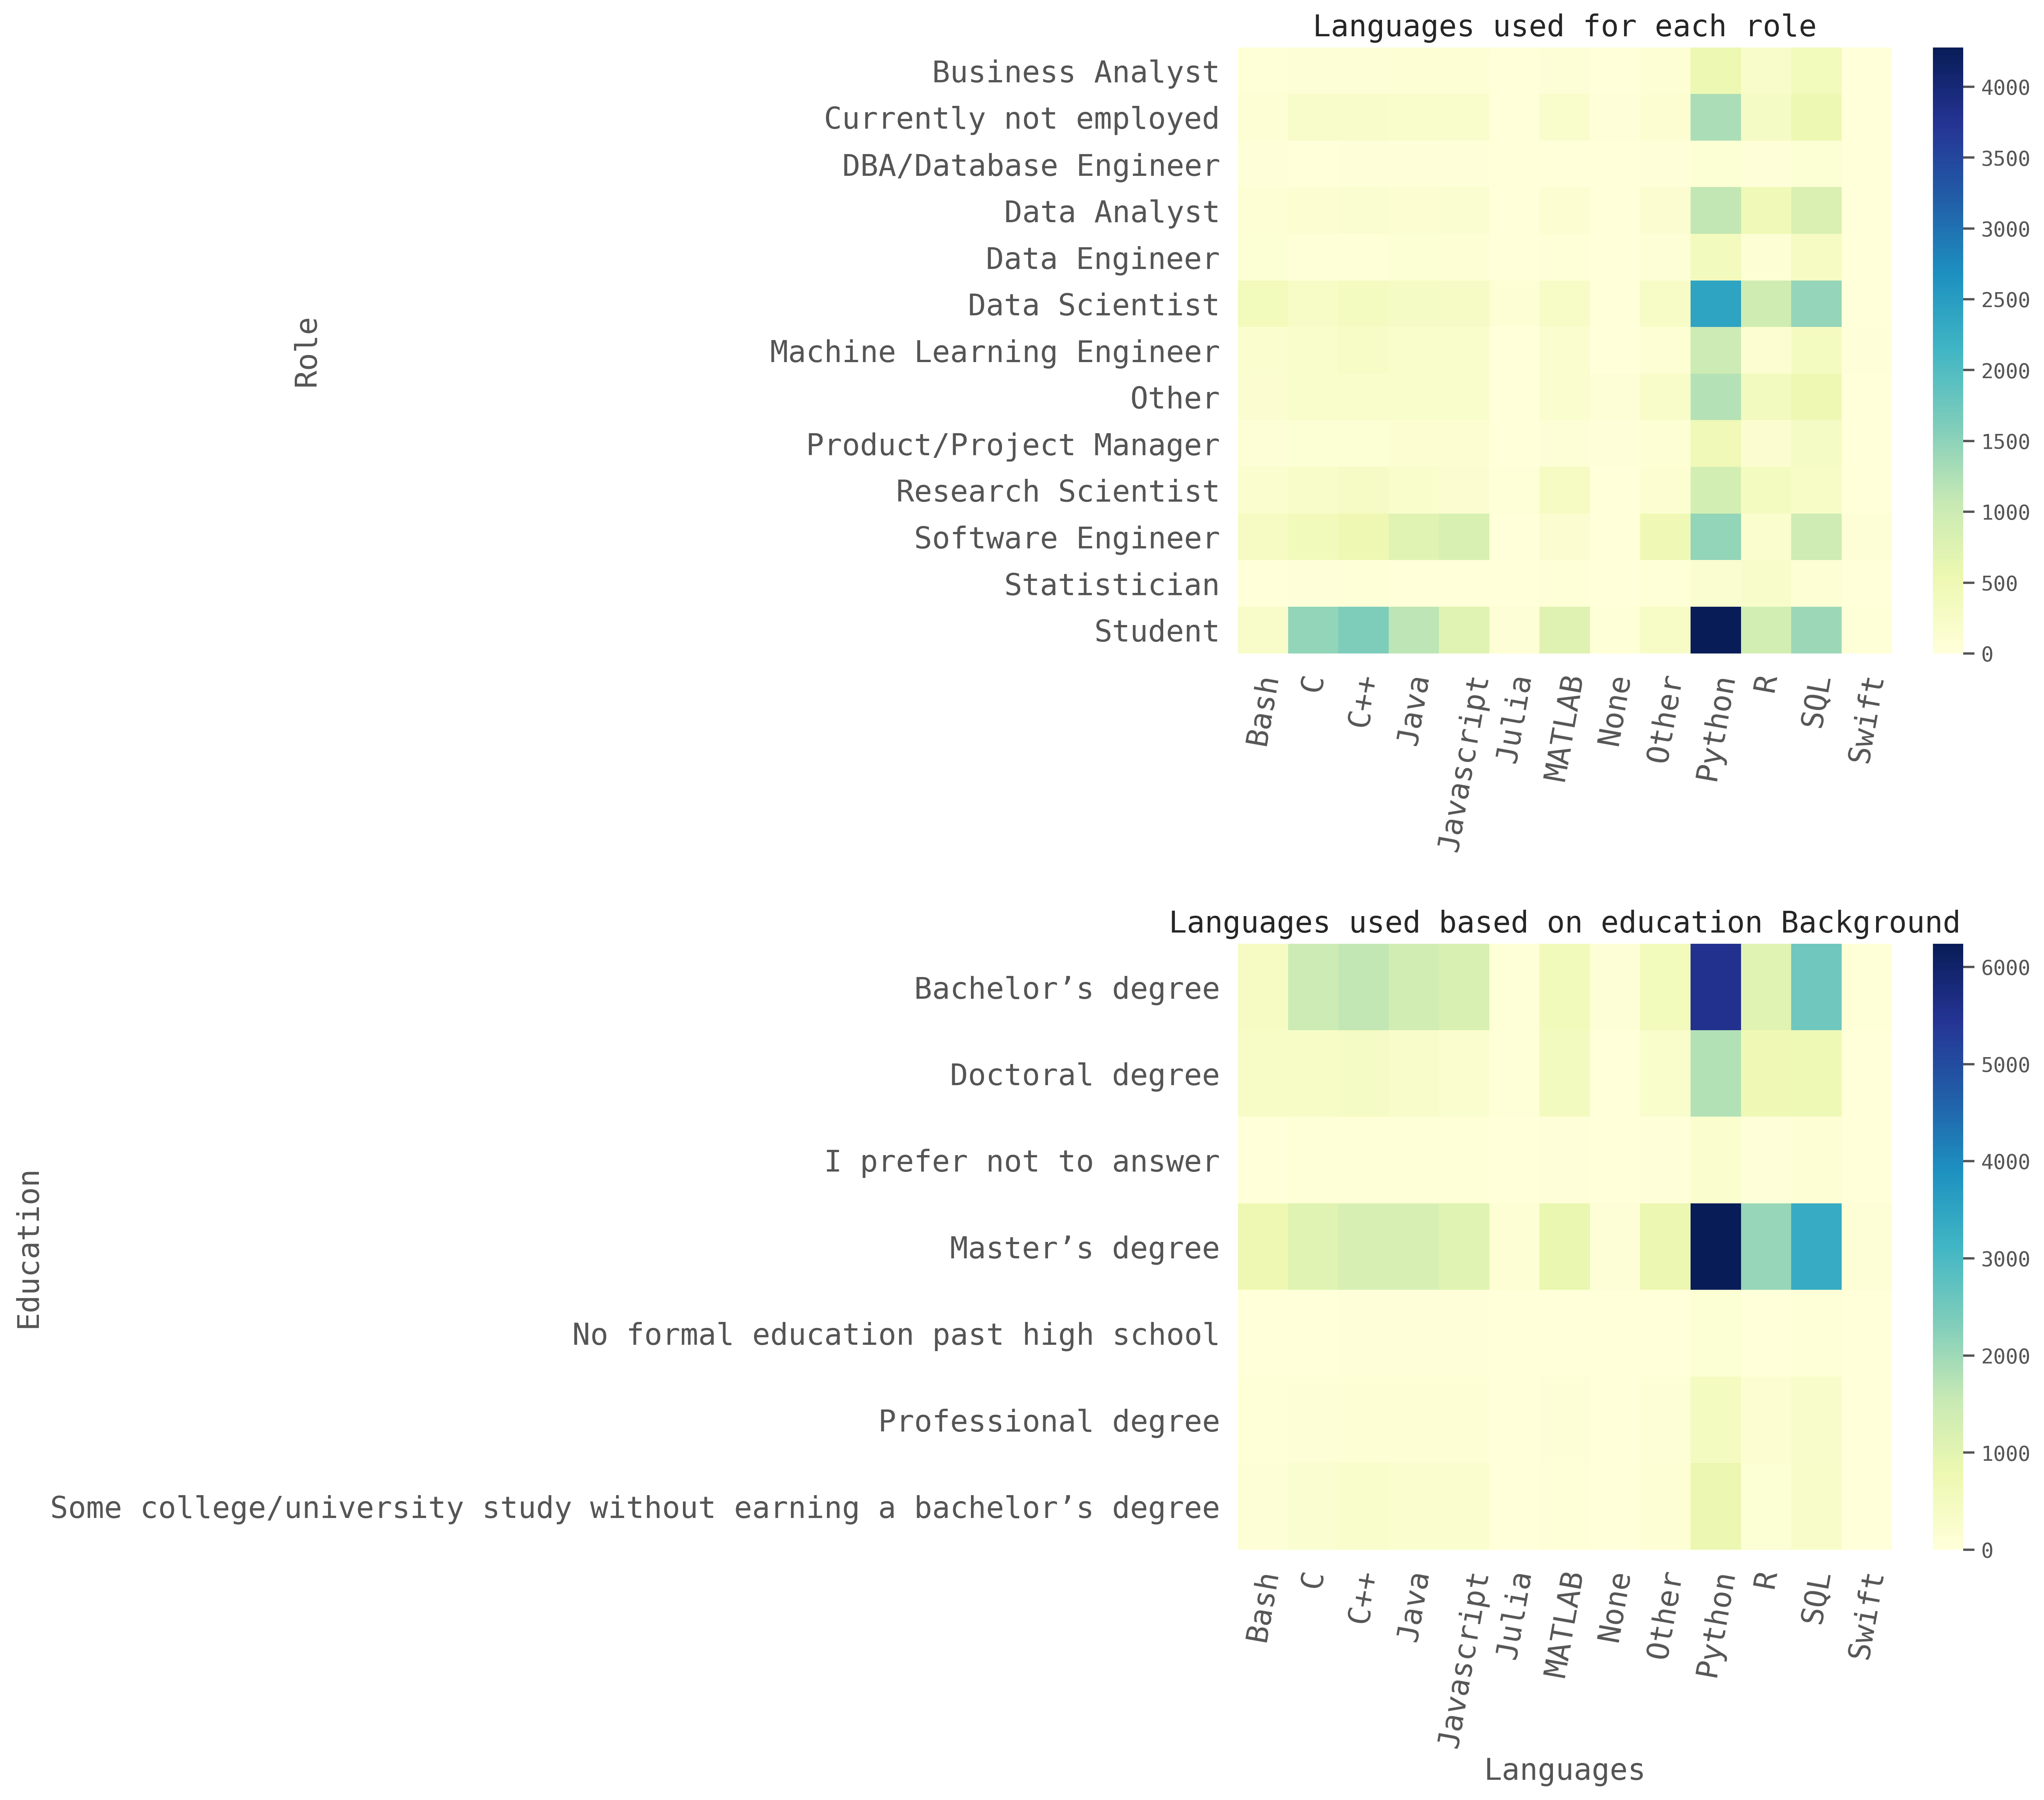

In [47]:
fig, ax =plt.subplots(2,1,figsize = (16,14))

sns.heatmap(new_table.T,cmap = 'YlGnBu', ax=ax[0])
sns.heatmap(new_table2.T, cmap = 'YlGnBu',ax=ax[1])

ax[0].set_title('Languages used for each role',fontsize=16)
ax[1].set_title('Languages used based on education Background',fontsize= 16)

ax[0].set_ylabel('Role',fontsize=16)
ax[1].set_ylabel('Education',fontsize=16)

ax[0].set_xlabel('',fontsize=16)
ax[1].set_xlabel('Languages',fontsize=16)

ax[0].tick_params(axis='both',which='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[0].tick_params(axis='x',rotation=80)
ax[1].tick_params(axis='x',rotation=80)
ax[0].yaxis.labelpad = 240
fig.tight_layout(pad=3.0);